In [46]:
# Import section
from datetime import datetime
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/PRSA_Data_Dingling_20130301-20170228.csv")

df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


## EXPLORATORY ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [28]:
aq_df = pd.read_csv("./data/PRSA_Data_Dingling_20130301-20170228.csv", parse_dates=[["year", "month", "day", "hour"]], keep_date_col=True)

aq_df.rename(columns={"year_month_day_hour": "datetime"}, inplace=True)

aq_df["datetime"] = pd.to_datetime(aq_df["datetime"], format='%Y %m %d %H')

/tmp/ipykernel_345397/354317182.py:1: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  aq_df = pd.read_csv("./data/PRSA_Data_Dingling_20130301-20170228.csv", parse_dates=[["year", "month", "day", "hour"]], keep_date_col=True)
/tmp/ipykernel_345397/354317182.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df = pd.read_csv("./data/PRSA_Data_Dingling_20130301-20170228.csv", parse_dates=[["year", "month", "day", "hour"]], keep_date_col=True)
/tmp/ipykernel_345397/354317182.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aq_df = pd.read_csv("./data/PRSA_Data_Dingling_20130301-20170228.csv", parse_dates=[

In [29]:
aq_df

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [30]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   No        35064 non-null  int64         
 2   year      35064 non-null  object        
 3   month     35064 non-null  object        
 4   day       35064 non-null  object        
 5   hour      35064 non-null  object        
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [31]:
aq_df["month"] = pd.to_numeric(df["month"])

In [33]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   No        35064 non-null  int64         
 2   year      35064 non-null  object        
 3   month     35064 non-null  int64         
 4   day       35064 non-null  object        
 5   hour      35064 non-null  object        
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [35]:
print("Rows        : ", aq_df.shape[0])
print("Columns     : ", aq_df.shape[1])
print("\nFeatures  : \n", aq_df.columns.tolist())
print("\nMissing values  : ", aq_df.isnull().any())
print("\nUnique values  : ", aq_df.nunique())

Rows        :  35064
Columns     :  19

Features  : 
 ['datetime', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values  :  datetime    False
No          False
year        False
month       False
day         False
hour        False
PM2.5        True
PM10         True
SO2          True
NO2          True
CO           True
O3           True
TEMP         True
PRES         True
DEWP         True
RAIN         True
wd           True
WSPM         True
station     False
dtype: bool

Unique values  :  datetime    35064
No          35064
year            5
month          12
day            31
hour           24
PM2.5         486
PM10          554
SO2           327
NO2           636
CO            103
O3            792
TEMP          998
PRES          593
DEWP          602
RAIN          116
wd             16
WSPM           95
station         1
dtype: int64


In [36]:
aq_df.describe()

,datetime,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,2015-03-01 11:30:00,17532.500000,6.522930,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
min,2013-03-01 00:00:00,1.000000,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,2014-03-01 05:45:00,8766.750000,4.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,2015-03-01 11:30:00,17532.500000,7.000000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,2016-02-29 17:15:00,26298.250000,10.000000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,2017-02-28 23:00:00,35064.000000,12.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000
std,NaN,10122.249256,3.448752,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808


In [37]:
# make a copy:
aq_df_non_indexed = aq_df.copy()

In [39]:
aq_df = aq_df.set_index('datetime')
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [40]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [41]:
aq_df.loc["2013-03-01": "2015-03-01"]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-01 19:00:00,17540,2015,3,1,19,35.0,51.0,10.0,13.0,700.0,79.0,9.2,1006.8,-15.4,0.0,SW,1.4,Dingling
2015-03-01 20:00:00,17541,2015,3,1,20,31.0,50.0,8.0,11.0,500.0,66.0,6.7,1007.3,-14.1,0.0,E,1.0,Dingling
2015-03-01 21:00:00,17542,2015,3,1,21,33.0,42.0,13.0,16.0,1000.0,55.0,5.0,1007.5,-14.2,0.0,NW,1.1,Dingling


In [42]:
aq_df.loc["2013": "2015"]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [43]:
pm_data = aq_df["PM2.5"]
pm_data.head()

datetime
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='datetime'>

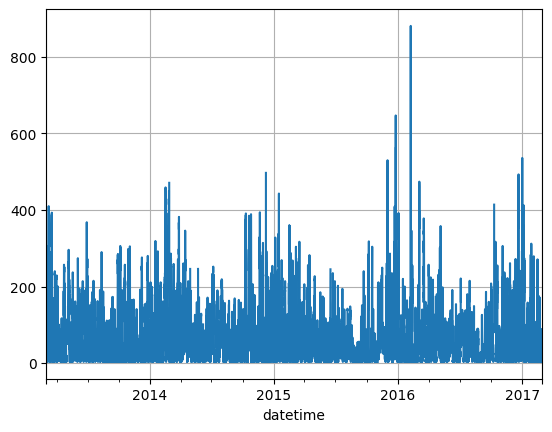

In [48]:
pm_data.plot(grid=True)

<Axes: xlabel='datetime'>

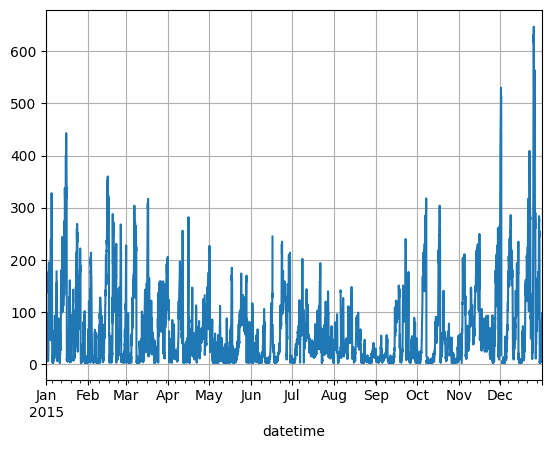

In [49]:
aq_df_2015 = aq_df.loc["2015"]
pm_data_2015 = aq_df_2015["PM2.5"]
pm_data_2015.plot(grid=True)